Image Augmentation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/drive/MyDrive/Flowers-Dataset/flowers"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [ ]:
x_train = train_datagen.flow_from_directory(data_dir,target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4337 images belonging to 5 classes.


In [ ]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("vertical",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Creating Model

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [ ]:
training_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=57,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4337 files belonging to 5 classes.
Using 3470 files for training.


In [ ]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
seed=107,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4337 files belonging to 5 classes.
Using 867 files for validation.


In [ ]:
training_ds.class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

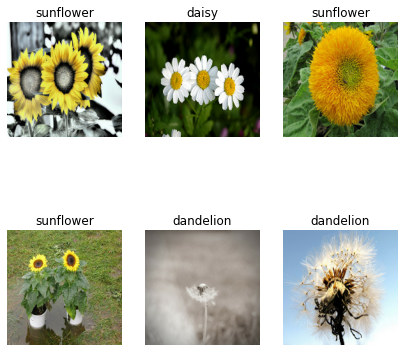

In [ ]:
plt.figure(figsize=(7, 7))
for data, labels in training_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(data[i].numpy().astype("uint8"))
    plt.title(training_ds.class_names[labels[i]])
    plt.axis("off")

Convolution layer

In [ ]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))

Maxpooling layer

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

Flatten

In [ ]:
model.add(Flatten())

Hidden/dense layers

In [ ]:
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu"))

Output layer

In [ ]:
model.add(Dense(5, activation = "softmax"))

Compiling Model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Fit The Model

In [31]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 31s 698ms/step - loss: 0.7030 - accuracy: 0.7353
Epoch 2/15
44/44 [==============================] - 30s 682ms/step - loss: 0.5937 - accuracy: 0.7766
Epoch 3/15
44/44 [==============================] - 30s 683ms/step - loss: 0.6016 - accuracy: 0.7812
Epoch 4/15
44/44 [==============================] - 32s 720ms/step - loss: 0.5826 - accuracy: 0.7830
Epoch 5/15
44/44 [==============================] - 30s 686ms/step - loss: 0.5739 - accuracy: 0.7853
Epoch 6/15
44/44 [==============================] - 31s 689ms/step - loss: 0.5455 - accuracy: 0.7953
Epoch 7/15
44/44 [==============================] - 30s 682ms/step - loss: 0.5161 - accuracy: 0.8125
Epoch 8/15
44/44 [==============================] - 30s 676ms/step - loss: 0.5225 - accuracy: 0.8038
Epoch 9/15
44/44 [==============================] - 30s 681ms/step - loss: 0.5047 - accuracy: 0.8128
Epoch 10/15
44/44 [==============================] - 32s 721ms/step - loss: 0.5081 - accura

Save The Model

In [32]:
model.save("flowers.h1")

Test The Model

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
model = load_model("/content/flowers.h1")

In [52]:
rose_img = image.load_img('/content/drive/MyDrive/Flowers-Dataset/flowers/rose/1446090416_f0cad5fde4.jpg',target_size=(64,64))
x = image.img_to_array(rose_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)

1/1 [==============================] - 0s 23ms/step


In [53]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(predicted_class)]

'roses'

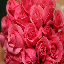

In [54]:
rose_img